In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import easyocr

Funções para exibir imagem em grid

In [2]:
def showSingleImage(img, title, size, mincolor=0, maxcolor=255):
    fig, axis = plt.subplots(figsize = size)
    axis.imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()

def showMultipleImages(imgsArray, titlesArray, size, x, y, mincolor=0, maxcolor=255):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18})
            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18})
            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18})
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')
            
            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
        plt.show()

Pegando a IMAGEM

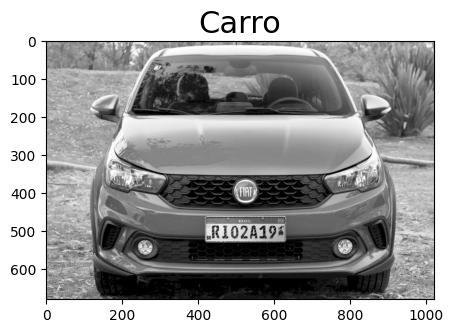

In [49]:
img = cv2.imread("Carro.png", 0)
showSingleImage(img, "Carro", (5, 5))

Aplicando TRHESINGHOLDING

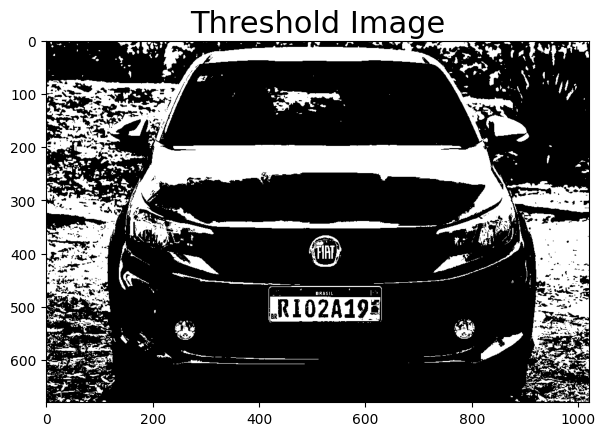

In [50]:
threshold, img_thresh = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
showSingleImage(img_thresh, "Threshold Image", (7, 7))

Aplicnado Black Hat

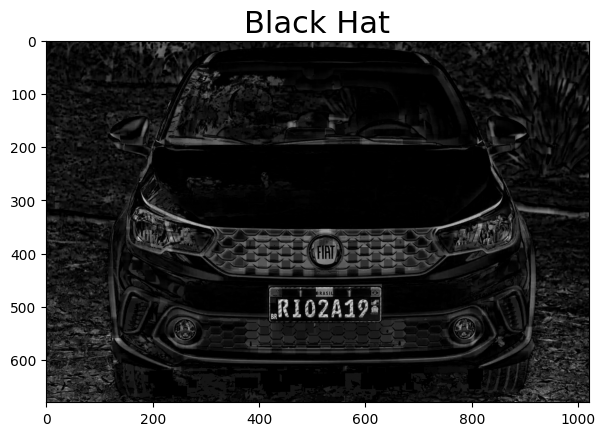

In [51]:
#mesma imagem com filtro de fechamento
img_car_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((15,15)))
#imagem com filtro black hat
img_car_blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, np.ones((15,15)))
imgsArray = [img, img_car_blackhat]
titlesArray = ['Original', 'Black Hat']
showSingleImage(img_car_blackhat, 'Black Hat', (7, 7))

Aplicando OCR

In [45]:
reader = easyocr.Reader(['pt']) 

img = cv2.imread('Carro.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    

blurred = cv2.medianBlur(gray, 3)

resultados = reader.readtext(blurred)

for resultado in resultados:
    texto = resultado[1]
    print(texto)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteFIAT 
R102A19?


In [ ]:
##Reconhecimento de rosto em imagem
import cv2
import numpy as np
import matplotlib.pyplot as plt






